The purpose of this notebook is to test the following method:
- https://karateclub.readthedocs.io/en/latest/_modules/karateclub/graph_embedding/graph2vec.html

TODO (?):
- https://pypi.org/project/cogdl/
- https://docs.cogdl.ai/en/latest/_modules/cogdl/models/emb/graph2vec.html?fbclid=IwAR0eDx4p_OjlGpb_Q2l-t2BVt3hVtqqtq6kdoABVnye3ehDJcrSEpj1XLfY

In [5]:
# prerequisites
# !pip install karateclub

In [6]:
%load_ext autoreload
%autoreload 2
import sys
import os
import json
import glob

import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt
from typing import Tuple, List

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from IPython.display import Markdown, display
from tqdm.notebook import tqdm

from karateclub.graph_embedding.graph2vec import Graph2Vec

sys.path.append("../")
from src.utils import read_stargazers_dataset, create_logreg_model


plt.rcParams["figure.figsize"] = (16, 8)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
def calculate_measure(func, G, kwargs={}):
    return func(G, **kwargs)

In [8]:
graphs, labels = read_stargazers_dataset("../datasets/github_stargazers")

len(graphs)

12725

## Parameters section

In [9]:
subset_card = 12725  # 12725  # number of graphs
expt_iter_num = 1000  # number of models to train

## Execution section

In [10]:
graphs_subset = graphs[:subset_card]

k_graph2vec = Graph2Vec()

  0%|          | 0/1000 [00:00<?, ?it/s]

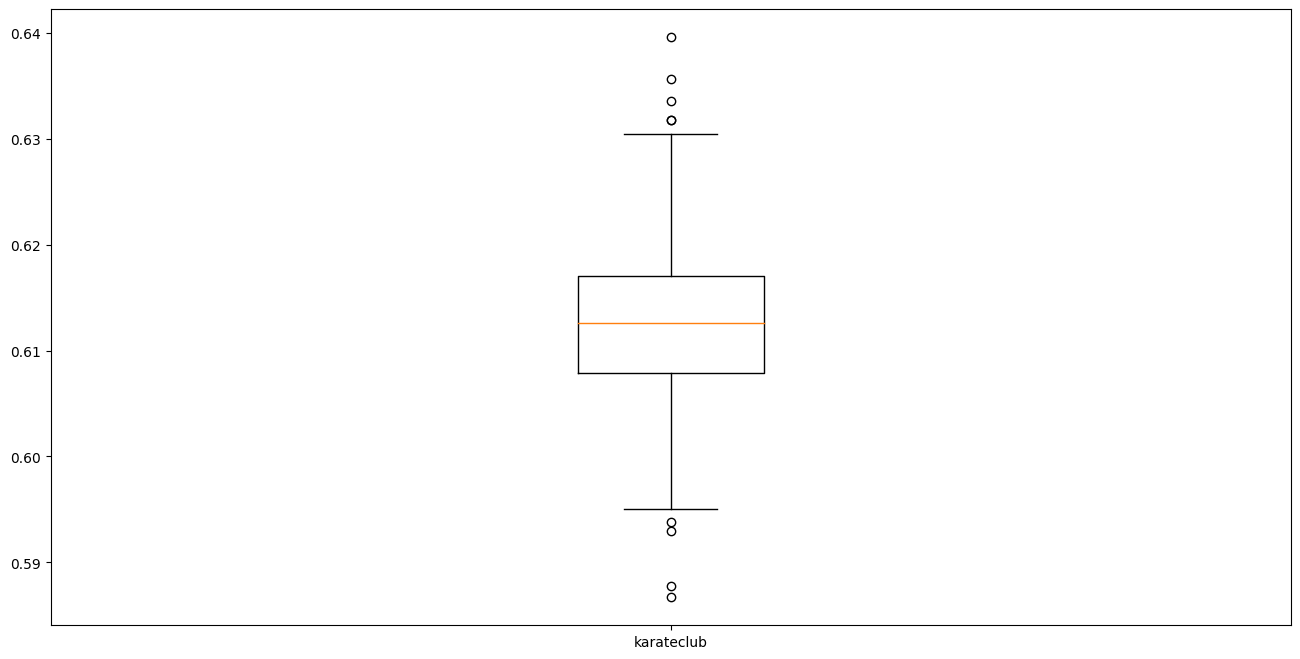

In [11]:
# below we run experiments for karateclob implementation

# benchmark
k_graph2vec.fit(graphs_subset)

# experiment
k_res = [0] * expt_iter_num

for it in tqdm(range(expt_iter_num)):
    k_res[it] = create_logreg_model(
        X=k_graph2vec.get_embedding(), y=labels[:subset_card]
    )

# results
res_nested_list = [k_res]
axis_labels = ["karateclub"]

n_items = len(res_nested_list)
plt.boxplot(res_nested_list, positions=range(n_items))
plt.xticks(range(n_items), labels=axis_labels[:n_items])
plt.show()